## 1. 밑바닥부터 시작하는 딥러닝 정리(챕터 6까지)
  
  ### 1-1. 퍼셉트론
  
  ![대체 텍스트](https://i.imgur.com/YYnnpLC.png)
  
  출처 : 밑바닥부터 시작하는 딥러닝
  
  퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력합니다.
  
  퍼셉트론으로 구성하는 논리회로(AND,OR,NAND)

In [2]:
import numpy as np

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5,0.5])
  b = -0.7
  tmp = np.sum(w*x)+b
  if tmp <= 0:
    return 0
  else:
    return 1
  
print("AND(0,0) : ",AND(0, 0))
print("AND(0,1) : ",AND(0, 1))
print("AND(1,0) : ",AND(1, 0))
print("AND(1,1) : ",AND(1, 1))

AND(0,0) :  0
AND(0,1) :  0
AND(1,0) :  0
AND(1,1) :  1


In [3]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1
  
print("OR(0,0) : ",OR(0, 0))
print("OR(0,1) : ",OR(0, 1))
print("OR(1,0) : ",OR(1, 0))
print("OR(1,1) : ",OR(1, 1))

OR(0,0) :  0
OR(0,1) :  1
OR(1,0) :  1
OR(1,1) :  1


In [4]:
def NAND(x1, x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7
  tmp = np.sum(w*x)+b
  if tmp <= 0:
    return 0
  else:
    return 1

print("NAND(0,0) : ",NAND(0, 0))
print("NAND(0,1) : ",NAND(0, 1))
print("NAND(1,0) : ",NAND(1, 0))
print("NAND(1,1) : ",NAND(1, 1))

NAND(0,0) :  1
NAND(0,1) :  1
NAND(1,0) :  1
NAND(1,1) :  0


   ![대체 텍스트](https://i.imgur.com/UEBgfhu.png)
  
    출처 : 밑바닥부터 시작하는 딥러닝
  
    퍼셉트론 하나로는 논리회로 중 XOR는 해결되지 않음.
  
    이 퍼셉트론 하나로는 해결되지 않으니 다층 퍼셉트론으로는 해결 가능합니다.
    (층을 늘리는 것입니다.)

In [5]:
def XOR(x1,x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y
  
print("XOR(0,0) : ",XOR(0, 0))
print("XOR(0,1) : ",XOR(0, 1))
print("XOR(1,0) : ",XOR(1, 0))
print("XOR(1,1) : ",XOR(1, 1))

XOR(0,0) :  0
XOR(0,1) :  1
XOR(1,0) :  1
XOR(1,1) :  0


  #### 퍼셉트론 정리

  - 퍼셉트론은 입출력을 갖춘 알고리즘. 입력을 주면 정해진 규칙에 따른 값을 출력.
  - 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정
  - 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있음.

### 1-2. 활성화 함수

활성화함수란 임계값을 경계로 출력이 바꿔집니다.

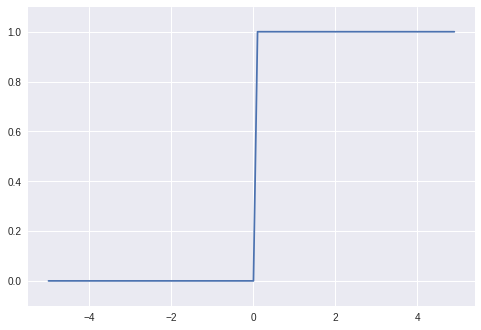

In [6]:
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

위와 같은 함수처럼 임계값 0을 기준으로 출력값이 0과 1이 달라지게 됩니다.

신경망에서 자주 쓰이는 시그모이드의 함수는 아래와 같습니다.

![대체 텍스트](https://i.imgur.com/zr3NnxX.png)

출처 : 밑바닥부터 시작하는 딥러닝 

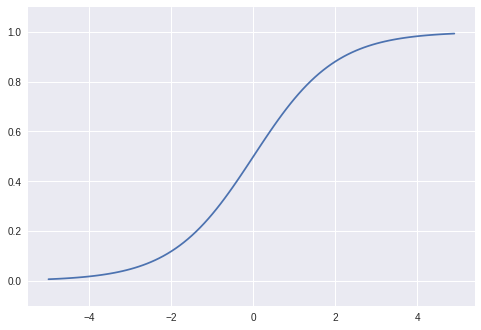

In [7]:
 def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

활성화 함수인 두 함수의 특징은 비선형 함수라는 것.

선형함수의 경우 층을 아무리 깊게해도 '은닉층이 없는 네트워크'와 똑같은 기능을 할 수 있는 문제가 있음.

h(x) = cx인 경우 3층일때 y(x) = h(h(h(x))) = c*c*c*x 

a = c^3라고 한다면 y(x) = ax

위와 같은 문제가 있기 때문에 활성화 함수는 선형이 아닌 비선형으로 사용됨.

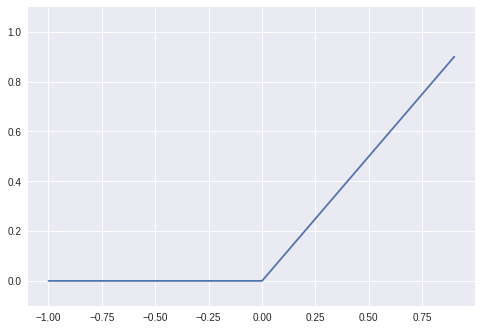

In [8]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-1.0, 1.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

2006년 hinton교수가 sigmoid함수의 문제점을 제기하고 대신 사용된 활성화함수인 Relu의 그래프입니다.
지금은 거의 시그모이드 함수 대신 Relu함수가 각광받고 있습니다.

![대체 텍스트](https://i.imgur.com/MVQZy25.png)

출처 :  밑바닥부터 시작하는 딥러닝

### 1-3. 파이썬으로 구성하는 심층 신경망

In [9]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
[0.31682708 0.69627909]


### 1-4. softmax 함수

softmax함수는 출력을 확률로 해석될 수 있게 해줍니다.


In [10]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


출력의 총합은 1이되며 y[0]=1.8%, y[1]=24.5% y[2]=73.65% 등 확률로 해석가능.

신경망 정리


*   기계학습 문제는 크게 회귀와 분류로 나누어짐
*   출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 소프트맥스함수 사용
*   입력 데이터를 묶은 것을 배치라 하며, 배치 단위로 추론 처리를 진행하면 결과를 훨씬 빠르게 얻을 수 있음. 





### 1-5. 손실함수


손실함수에는 평균 제곱 오차와 교차 엔트로피 오차를 사용합니다.

-평균 제곱 오차

![대체 텍스트](https://i.imgur.com/HobMT11.png)

출처 : 밑바닥부터 시작하는 딥러닝

In [12]:
# 평균 제곱 오차
def mean_spuared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(mean_spuared_error(np.array(y1),np.array(t)))
print(mean_spuared_error(np.array(y2),np.array(t)))

0.09750000000000003
0.5975


평균 제곱 오차가 적은 것이 정답에 더 가깝다는 것을 볼 수 있습니다.

-교차 엔트로피 오차

![대체 텍스트](https://i.imgur.com/CYuaj8x.png)


출처 :  밑바닥부터 시작하는 딥러닝

In [13]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y + delta))

print(cross_entropy_error(np.array(y1),np.array(t)))
print(cross_entropy_error(np.array(y2),np.array(t)))

0.510825457099338
2.302584092994546


교차 엔트로피 오차도 적은 것이 정답에 가깝다는 것을 볼 수 있습니다. 

![대체 텍스트](https://i.imgur.com/O317hMu.png)

출처 : 밑바닥부터 시작하는 딥러닝

계단함수는 한순간만 변화가 일어나지만 시그모이드 함수 미분(접선)은 위의 그림과 같이 출력(세로축의 값)이 연속적으로 변하고 곡선의 기울기도 연속적으로 변합니다.

시그모이드 함수의 이러한 성질은 신경망이 올바르게 학습할 수 있도록 하게합니다. 

(어느 장소에서도 함수의 미분이 0이 되지 않는 성질입니다.)


### 1-6. 기울기(미분)

0.1999999999990898


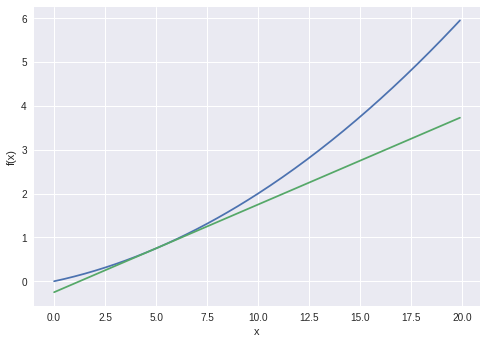

In [9]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


2차 방정식의 미분을 그래프화한 것입니다. 

파란색의 선이 2차 방정식의 선이고 초록색은 2차 방정식을 미분한 값입니다.

No handles with labels found to put in legend.


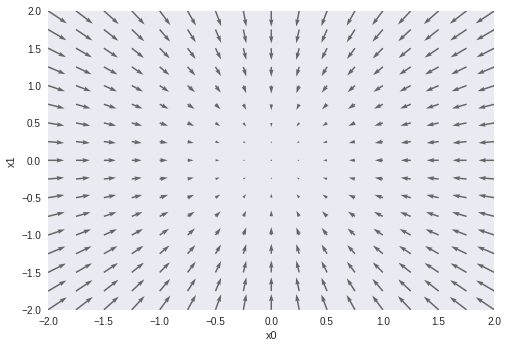

In [10]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


기울기(미분)를 좀 더 명확하게 표현한 모습입니다

책에서는 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이라고 표현하고 있습니다.

이제 신경망 학습에서 사용되는 경사하강법에서 살펴보면 글로 풀자면 아래와 같습니다.

경사하강법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다.
그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복합니다.
이렇게 함수 값을 점차 줄이는 것을 경사하강법이라고 합니다.

![대체 텍스트](https://i.imgur.com/gFwbYl3.png)

출처 : 밑바닥부터 시작하는 딥러닝


#### 신경망 학습 정리

* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터를 나눠 사용
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복
* 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다




#### 1-7. 오차역전파법

* 순전파는 통상의 계산을 수행. 역전파는 노드의 미분을 구함
* 오차역전파법 : 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산
* 수치 미분에 비해 오차역전파법이 더 빠르게 기울기를 구할 수 있음 (구체적인 계산 과정은 http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/5%EC%9E%A5.ipynb 참고)

예시) ReLU 의 오차역전파법

![대체 텍스트](https://i.imgur.com/oid5cch.png)

출처 : 밑바닥부터 시작하는 딥러닝

ReLU 계층은 전기 회로의 '스위치' 비유

순전파 때 전류가 흐르고 있으면 스위치가 ON, 흐르지 않으면 OFF

역전파 때 스위치가 ON이라면 전류가 그대로 흐르고, OFF면 더 이상 흐리지 않습니다.

### 1-8. 최적화(optimiztion) 방법

![대체 텍스트](https://i.imgur.com/XMPO5Lp.png)

출처 : 밑바닥부터 시작하는 딥러닝

SGD(확률적 경사 하강법) :  매개변수 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하여 점점 최적의 매개변수로 다가가는 방법

Momentum : 공이 그릇을 구르는 듯한 물리 법칙에 따르는 움직임

AdaGrad: 매개변수의 원소마다 적응적으로 갱신 정도를 조정

Adam: 모멘텀과 Adagrad 기법을 융합

![대체 텍스트](https://i.imgur.com/CIrgMm8.png)

일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높음.
요즘은 거의 Adam으로 쓰는 추세임.

### 1-9. 드롭아웃

![대체 텍스트](https://i.imgur.com/tGpF9Mz.png)

뉴런을 임의로 삭제하면서 학습하는 방법으로 오버피팅을 방지하는 방법 중 하나입니다.

훈련때에만 뉴런을 랜덤하게 삭제하며 시험때에는 모든 뉴런에 신호를 전달합니다.


## 2. 텐서플로우 맛 정리

### 2-1. 선형 회귀 모델

In [26]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = W * X + b

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
        
        print("Step : ",step)
        print("X : ",sess.run(X, feed_dict={X:x_data}))
        print("W : ",sess.run(W))
        print("b : ",sess.run(b))
        print("hypothesis : ", sess.run(hypothesis, feed_dict={X: x_data, Y: y_data}))
        print("cost : ", sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

Tensor("X_9:0", dtype=float32)
Tensor("Y_9:0", dtype=float32)
Step :  0
X :  [1. 2. 3.]
W :  [0.70372397]
b :  [0.9006662]
hypothesis :  [1.6043901 2.308114  3.0118382]
cost :  0.15345395
Step :  1
X :  [1. 2. 3.]
W :  [0.61998177]
b :  [0.8390433]
hypothesis :  [1.4590251 2.079007  2.6989887]
cost :  0.102518
Step :  2
X :  [1. 2. 3.]
W :  [0.6390481]
b :  [0.82324195]
hypothesis :  [1.46229   2.1013381 2.7403862]
cost :  0.09712694
Step :  3
X :  [1. 2. 3.]
W :  [0.64663976]
b :  [0.80297434]
hypothesis :  [1.449614  2.0962539 2.7428937]
cost :  0.09250709
Step :  4
X :  [1. 2. 3.]
W :  [0.65525293]
b :  [0.7837236]
hypothesis :  [1.4389765 2.0942295 2.7494824]
cost :  0.08811288
Step :  5
X :  [1. 2. 3.]
W :  [0.6635274]
b :  [0.7648777]
hypothesis :  [1.428405  2.0919325 2.7554598]
cost :  0.08392746
Step :  6
X :  [1. 2. 3.]
W :  [0.67161745]
b :  [0.7464912]
hypothesis :  [1.4181087 2.089726  2.7613435]
cost :  0.079940856
Step :  7
X :  [1. 2. 3.]
W :  [0.67951137]
b :  [0.72854

### 2-2. 기본 신경망

In [12]:
# tensorflow와 numpy를 불러옵니다.
import tensorflow as tf
import numpy as np

# 레이블의 데이터는 원-핫 인코딩형태로 구성됩니다.
# 원-핫 인코딩 : 표현하려는 값을 뜻하는 인덱스 원소만 1로 표기하고 나머지 원소는 모두 0으로 채우는 표기법입니다.
# [털, 날개]
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
print("x_data : ",np.shape(x_data))
# x_data 는 1X6의 행렬
# 기타 = [1, 0, 0] 포유류 = [0, 1, 0] 조류 = [0, 0, 1]
y_data = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[1,0,0],[0,0,1]])
print("y_data : ",np.shape(y_data))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 편향을 각각 각 레이어의 아웃풋 갯수로 설정합니다.
# 편향은 아웃풋의 갯수, 즉 최종 결과값의 분류 갯수인 3으로 설정합니다.
W = tf.Variable(tf.random_uniform([2,3],-1.,1.))
# 가중치 변수 W는 [입력층(특징 수), 출력층(레이블 수)], 편향변수 b는 레이블 수인 3개의 요소를 가진 변수로 설정
b = tf.Variable(tf.zeros([3]))

# 신경망에 가중치 W과 편향 b을 적용합니다
# L = tf.add(tf.matmul(X, W), b) 는 X*W+b를 구현한 것입니다.
L = tf.add(tf.matmul(X, W), b)
# 가중치와 편향을 이용해 계산한 결과 값에
# 텐서플로우에서 기본적으로 제공하는 활성화 함수인 ReLU 함수를 적용합니다
L = tf.nn.relu(L)

# 마지막으로 softmax 함수를 이용하여 출력값을 사용하기 쉽게 만듭니다
# softmax 함수는 다음처럼 결과값을 전체합이 1인 확률로 만들어주는 함수입니다.
# 예) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
model = tf.nn.softmax(L)

# 신경망을 최적화하기 위한 비용 함수를 작성합니다.
# 각 개별 결과에 대한 합을 구한 뒤 평균을 내는 방식을 사용합니다.
# 전체 합이 아닌, 개별 결과를 구한 뒤 평균을 내는 방식을 사용하기 위해 axis 옵션을 사용합니다.
# axis 옵션이 없으면 -1.09 처럼 총합인 스칼라값으로 출력됩니다.
#        Y         model         Y * tf.log(model)   reduce_sum(axis=1)
# 예) [[1 0 0]  [[0.1 0.7 0.2]  -> [[-1.0  0    0]  -> [-1.0, -0.09]
#     [0 1 0]]  [0.2 0.8 0.0]]     [ 0   -0.09 0]]
# 즉, 이것은 예측값과 실제값 사이의 확률 분포의 차이를 비용으로 계산한 것이며,
# 이것을 Cross-Entropy 라고 합니다
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(model),axis=1))

# 기본적인 경사하강법으로 최적화합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

# 텐서플로의 세션을 초기화합니다.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 앞서 구성한 특징과 레이블 데이터를 이용해 학습을 100번 진행합니다.
# 신경망 모델 학습
for step in range(100):
  sess.run(train_op, feed_dict={X:x_data, Y:y_data})
  
  # 학습 도중 20번에 한 번씩 손실값을 출력해봅니다.
  if (step + 1) % 50 == 0:
    print(step + 1,sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    print("X : ",sess.run(X, feed_dict={X:x_data}))
    print("W : ",sess.run(W))
    print("b : ",sess.run(b))
    print("L : ",sess.run(L, feed_dict={X: x_data, Y: y_data}))
    print("model : ",sess.run(model, feed_dict={X: x_data, Y: y_data}))
    print("Y : ",sess.run(Y, feed_dict={Y:y_data}))
    
    
#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
# tf.argmax: 예측값과 실제값의 행렬에서 tf.argmax 를 이용해 가장 큰 값을 가져옵니다.
# 예) [[0 1 0] [1 0 0]] -> [1 0]
#    [[0.2 0.7 0.1] [0.9 0.1 0.]] -> [1 0]
prediction = tf.argmax(model, axis=1)
target = tf.argmax(Y, axis=1)
print('예측값:',sess.run(prediction, feed_dict={X: x_data}))
print('실제값:',sess.run(target, feed_dict={Y: y_data}))
is_correct = tf.equal(prediction,target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:%.2f' % sess.run(accuracy*100,feed_dict={X:x_data,Y:y_data}))

x_data :  (6, 2)
y_data :  (6, 3)
50 1.1919755
X :  [[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]]
W :  [[ 0.05458459  0.91043437 -0.24742794]
 [-0.81989694  0.6731468  -0.05407214]]
b :  [-0.01960769 -0.06307384  0.        ]
L :  [[0.         0.         0.        ]
 [0.0349769  0.84736055 0.        ]
 [0.         1.5205073  0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.610073   0.        ]]
model :  [[0.33333334 0.33333334 0.33333334]
 [0.23702858 0.53409004 0.22888139]
 [0.15210177 0.69579643 0.15210177]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.2603783  0.47924337 0.2603783 ]]
Y :  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
100 1.1658512
X :  [[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]]
W :  [[ 0.03673292  0.8933381  -0.24742794]
 [-0.81989694  0.5782817  -0.05407214]]
b :  [-0.03745937 -0.11855632  0.        ]
L :  [[0.         0.         0.        

### 2-3. 심층 신경망

In [24]:
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
# 기타 = [1, 0, 0] 포유류 = [0, 1, 0] 조류 = [0, 0, 1]
y_data = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[1,0,0],[0,0,1]])

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 가중치
# W1 = [2,10] -> [특징,은닉층의 뉴런 수]
# W2 = [10, 3] -> [은닉층의 뉴런 수, 분류 수]
W1 = tf.Variable(tf.random_uniform([2, 10],-1.,1.))
W2 = tf.Variable(tf.random_uniform([10, 3],-1.,1.))

# 편향
# b1 = [10] -> 은닉층의 뉴런 수
# b2 = [3] -> 분류 수
b1 = tf.Variable(tf.zeros([10]))
b2 = tf.Variable(tf.zeros([3]))

L1 = tf.add(tf.matmul(X,W1),b1)
L1 = tf.nn.relu(L1)

model = tf.add(tf.matmul(L1, W2), b2)

# 텐서플로우에서 기본적으로 제공되는 크로스 엔트로피 함수를 이용해
# 복잡한 수식을 사용하지 않고도 최적화를 위한 비용 함수를 다음처럼 간단하게 적용할 수 있습니다.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

# 텐서플로의 세션을 초기화합니다.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 앞서 구성한 특징과 레이블 데이터를 이용해 학습을 100번 진행합니다.
for step in range(100):
  sess.run(train_op, feed_dict={X:x_data, Y:y_data})
  # 학습 도중 10번에 한 번씩 손실값을 출력해봅니다.
  if (step + 1) % 10 == 0:
    print("step cost : ",step + 1,sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    print("W1:",sess.run(W1))
    print("b1:",sess.run(b1))
    print("L1 : ",sess.run(L1, feed_dict={X: x_data, Y: y_data}))
    print("W2:",sess.run(W2))
    print("b2:",sess.run(b2))
    print("model : ",sess.run(model, feed_dict={X: x_data, Y: y_data}))

#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, axis=1)
target = tf.argmax(Y, axis=1)
print('예측값:',sess.run(prediction, feed_dict={X: x_data}))
print('실제값:',sess.run(target, feed_dict={Y: y_data}))
is_correct = tf.equal(prediction,target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:%.2f' % sess.run(accuracy*100,feed_dict={X:x_data,Y:y_data}))

step cost :  10 1.046596
W1: [[ 0.44128552 -0.44811106  0.8791843   0.6113248   0.43066537  0.5246577
  -0.841825   -0.2559269   0.45148063  0.16197136]
 [ 0.72483337 -0.154984    0.20120563 -0.01535047  0.26277563  0.43975636
   0.94219226  0.87467366 -0.6602466  -0.90898824]]
b1: [-0.09093576  0.         -0.09742142  0.00153605 -0.0020352  -0.09632207
 -0.01681095  0.08506852 -0.09935971 -0.00422897]
L1 :  [[0.         0.         0.         0.00153605 0.         0.
  0.         0.08506852 0.         0.        ]
 [0.35034975 0.         0.7817629  0.61286086 0.42863017 0.42833567
  0.         0.         0.3521209  0.1577424 ]
 [1.0751832  0.         0.98296857 0.5975104  0.69140583 0.86809206
  0.0835563  0.7038153  0.         0.        ]
 [0.         0.         0.         0.00153605 0.         0.
  0.         0.08506852 0.         0.        ]
 [0.         0.         0.         0.00153605 0.         0.
  0.         0.08506852 0.         0.        ]
 [0.6338976  0.         0.1037842  0.

## 3. 신경망 첫걸음 정리

3-1. 간단한 예측자

* 컴퓨터는 입력->연산->출력 시스템입니다. 인공신경망도 마찬가지입니다.
* 어떤 것의 동작 원리를 정확히 파악할 수 없을 때 취할 수 있는 한 방식은 우리가 조정할 수 있는 매개변수 값을 포함하는 모델을 만들어보는 것입니다.
* 모델을 정교화나가는 좋은 방법은 오차에 기초해 매개변수 값을 조정해나가는 것입니다.

3-2. 분류자 학습시키기

* 오차를 제거하기 위해 기울기를 조정해야함
* 이러한 과정의 문제점은 이전의 학습데이터는 무시하고 최종 학습 데이터만 맞춰 업데이트 되게 됩니다. 이를 해결하기 위해 학습률을 도입해 업데이트의 정도를 조정해줍니다. 

3-3 . 다중 계층에서의 오차 역전파

* 인공 신경망에서 학습이란 연결 노드의 가중치를 업데이트하는 과정을 의미합니다. 가중치의 업데이트는 오차에 의해 주도되는데, 오차는 학습 데이터로부터 주어진 정답과 출력 값 간의 차이를 의미.
* 중간 계층에 존재하는 노드들의 오차는 명백하지 않습니다. 한 가지 접근 방법은 출력 계층의 노드들의 오차를 이와 연결된 가중치의 크기에 비례해 나눠서 역전파하고 이를 재조합하는 방법.

3-4. 가중치의 진짜 업데이트

* 신경망의 오차는 가중치의 함수
* 신경망을 개선한다는 것은 가중치의 변화를 통해 오차를 줄인다는 뜻
* 최적의 가중치에 접근하는 방법은 작은 발걸음으로 오차함수를 줄여가면서 반복적으로 가중치를 개선해나가는 방법. 각 발걸음은 현재 위치에서 볼 때 가장 급격히 낮아지는 경사의 방향으로 취해집니다. 이런 방법을 경사 하강법이라고 함.


## 4. 내 멋대로 정리하는 딥러닝


![대체 텍스트](https://i.imgur.com/mGhooZr.png)